# PCA using Olivetti Faces image dataset

### Summary:
This Jupyter Notebook demonstrates a project that applies Principal Component Analysis (PCA) to a dataset of facial images. The key steps of the project include:

* Loading the Olivetti Faces dataset and standardizing the images.
* Calculating and visualizing eigenfaces, which are the principal components representing the most significant variations in the data.
* Reducing the dimensionality of the data with PCA and reconstructing the images with a reduced number of principal components.
* Comparing the original standardized images with the reconstructed images using a chosen number of principal components.

The project provides insights into dimensionality reduction and the role of eigenvalues in capturing and explaining variance within a dataset, making it a valuable resource for image analysis and PCA applications.

__Principal Component Analysis (PCA)___ is a dimensionality reduction technique and a fundamental tool in data analysis, statistics, and machine learning. It's used to transform high-dimensional data into a lower-dimensional form while preserving as much of the original data's variability as possible. Here's an explanation of PCA analysis:

__1. Data Dimensionality:__

In many real-world applications, datasets often contain a large number of features (dimensions) that describe each data point.
High dimensionality can lead to increased computational complexity, reduced interpretability, and the risk of overfitting in machine learning models.

__2. The Goal of PCA:__

PCA aims to reduce the dimensionality of a dataset while retaining its essential information.
It identifies the most important patterns and relationships in the data.

__3. Linear Transformation:__

PCA works through a linear transformation of the original data into a new set of variables, called principal components.
These principal components are linear combinations of the original features.

__4. Variance and Principal Components:__

* The first principal component explains the most variance in the data. It captures the largest source of variation.
* The second principal component is orthogonal (uncorrelated) to the first one and captures the second largest source of variation, and so on.
* Principal components are ranked by the amount of variance they explain.

__5. Steps in PCA:__

* __Standardization:__ The data is standardized to have a mean of 0 and a standard deviation of 1. Standardization ensures that all features are on the same scale and have equal influence.
* __Covariance Matrix:__ PCA calculates the covariance matrix of the standardized data to understand the relationships between features.
* __Eigenvalues and Eigenvectors:__ PCA finds the eigenvalues and eigenvectors of the covariance matrix. The eigenvalues represent the amount of variance explained by each principal component, and the eigenvectors represent the directions of maximum variance.
* __Selection of Principal Components:__ The principal components are chosen based on the eigenvalues. Components with larger eigenvalues capture more variance and are therefore more important.
* __Transformation:__ The original data is projected onto the selected principal components to create a lower-dimensional representation of the data.

__6. Applications of PCA:__

* __Dimensionality Reduction:__ PCA is widely used to reduce the number of features in datasets, which can be particularly useful in machine learning, where high dimensionality can lead to overfitting.
* __Noise Reduction:__ By emphasizing the most significant components, PCA can help reduce the impact of noise in data.
* __Data Visualization:__ PCA is often used for visualizing data in two or three dimensions, making it easier to identify clusters or patterns.
* __Feature Engineering:__ PCA can be applied to feature engineering by generating new, uncorrelated features.

__7. Limitations:__

PCA assumes that the principal components are orthogonal. In some cases, this may not hold true.
The interpretation of the principal components can be challenging in high-dimensional spaces.

In [6]:
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Download the data from sklearn's datasets
faces = datasets.fetch_olivetti_faces()['data']

# 0. Standardize the images using the mean and standard deviation
faces_mean = faces.mean(axis=0)
faces_std = faces.std(axis=0)
faces_standardized = (faces - faces_mean) / faces_std

# 1. Instantiate a PCA object and fit the standardized faces dataset
pca = PCA(n_components=400) 
pca.fit(faces_standardized)

PCA(n_components=400)

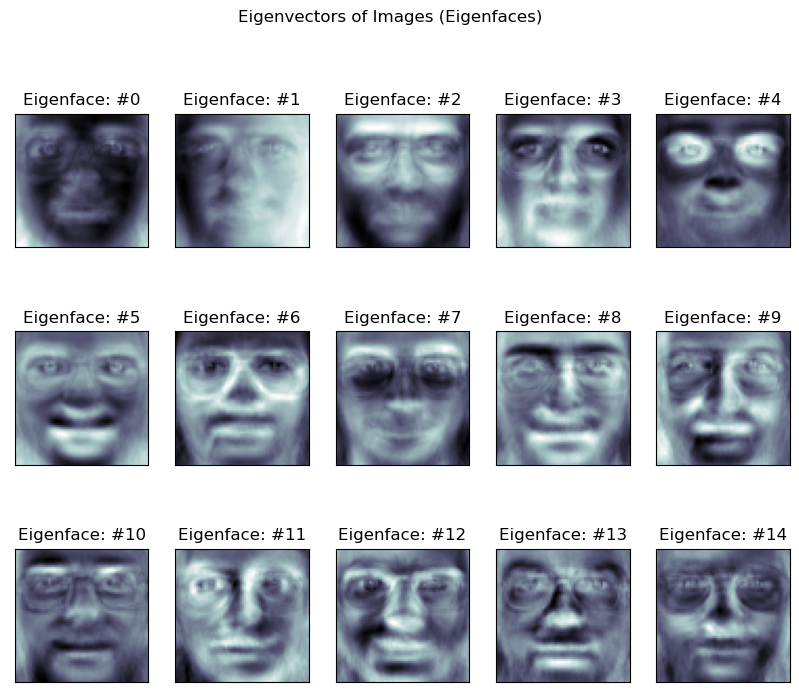

In [9]:
# 2. Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_ 

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface: #{i}')
    
    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()

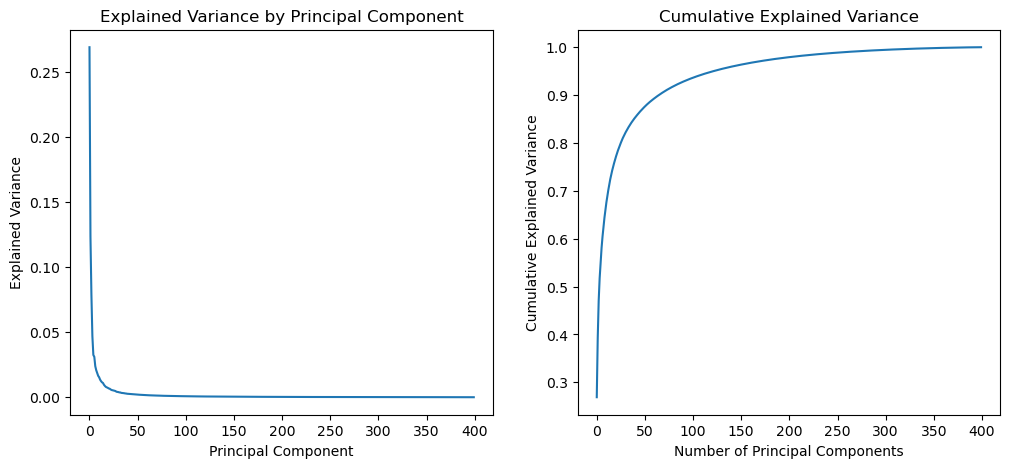

In [11]:
# 3. Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# 4. Plot the Explained Variance and Cumulative Explained Variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Explained Variance for each component
ax1.plot(explained_variance)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance')
ax1.set_title('Explained Variance by Principal Component')

# Plot Cumulative Explained Variance
ax2.plot(cumulative_variance)
ax2.set_xlabel('Number of Principal Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance')

plt.show()


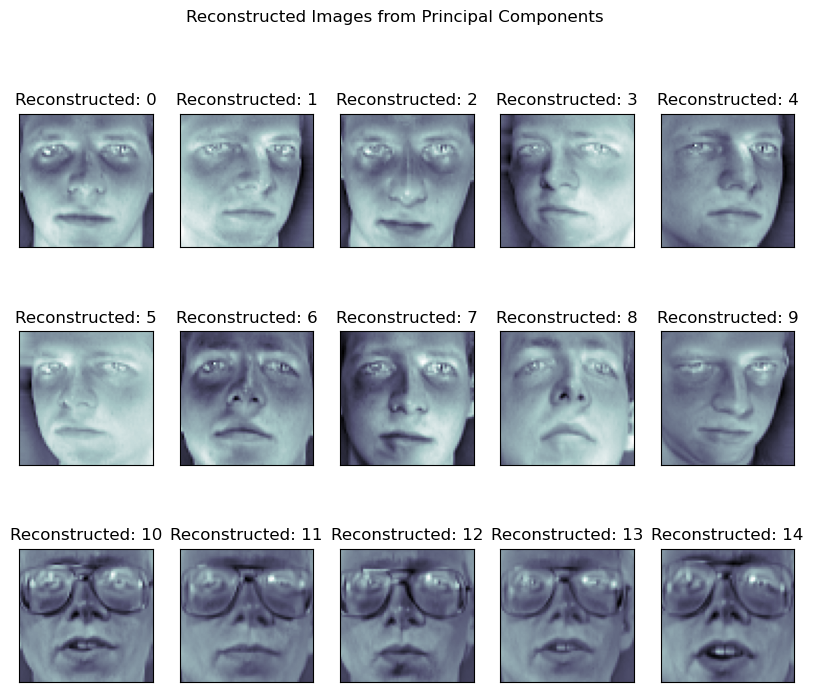

In [12]:
# 5. Reconstruct images from the compressed principal components
# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized) 

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the reconstructed images 
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i}')

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()

#  Reduce Dimensionality

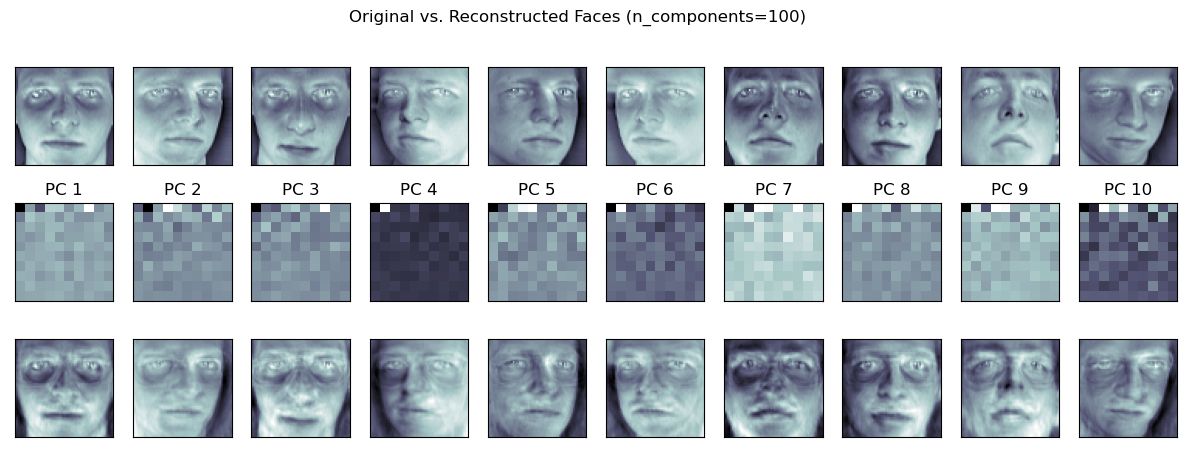

In [14]:
#  Reduce Dimensionality
n_components = 100  # Set the desired number of principal components
pca = PCA(n_components=n_components)
faces_pca = pca.fit_transform(faces_standardized)

#  Inverse Transform
# Reconstruct the data from the reduced dimensionality representation
faces_reconstructed = pca.inverse_transform(faces_pca)

#  Visualize Original vs. Reconstructed Images
fig, axes = plt.subplots(3, 10, figsize=(15, 5))
fig.suptitle(f'Original vs. Reconstructed Faces (n_components={n_components})')

for i in range(10):
    axes[0, i].imshow(faces_standardized[i].reshape(64, 64), cmap=plt.cm.bone)
    axes[0, i].set_xticks(()), axes[0, i].set_yticks(())

    axes[1, i].imshow(faces_pca[i].reshape(10, 10), cmap=plt.cm.bone)  # Adjust the reshape dimensions
    axes[1, i].set_xticks(()), axes[1, i].set_yticks(())
    axes[1, i].set_title(f'PC {i + 1}')

    axes[2, i].imshow(faces_reconstructed[i].reshape(64, 64), cmap=plt.cm.bone)
    axes[2, i].set_xticks(()), axes[2, i].set_yticks(())

plt.show()


PCA is a versatile technique used in various fields, including image processing, data compression, biology, finance, and more. It helps uncover meaningful patterns in data, simplifies complex datasets, and aids in making informed decisions in data analysis and modeling.